# Predictive Modeling: IMDB Movie Rating Analysis

**Author:** Data Mining Project  
**Dataset:** IMDB Movies Processed Dataset  
**Objective:** Build end-to-end predictive models for movie rating prediction (regression) and hit classification

---

## Project Overview

This notebook implements comprehensive machine learning models to:
1. **Regression:** Predict `averageRating` using movie features
2. **Classification:** Predict whether a movie is a "hit" (rating ≥ 7.0)

**Key Sections:**
- Data loading & preprocessing
- Feature engineering
- Multiple regression models (Linear, RF)
- Classification models (Logistic, RF)
- Cross-validation & hyperparameter tuning
- Feature importance analysis
- Genre-stratified modeling
- Residual analysis & model comparison

## 1. Setup & Library Imports

Import all required libraries for data manipulation, modeling, and visualization.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Utilities
from time import time

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

/Users/vaishnavverma/.matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /var/folders/gp/0qsbr0x11d315dt15fl17c940000gn/T/matplotlib-fbdjkcyz because there was an issue with the default path (/Users/vaishnavverma/.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


✓ All libraries imported successfully!


## 2. Data Loading

Load the processed IMDB dataset and perform initial exploration.

In [2]:
# Load dataset
df = pd.read_csv('../data/processed/imdb_movies_processed.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")
print("\n" + "="*60)

# Display first few rows
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (337971, 54)
Rows: 337,971 | Columns: 54


First 5 rows:


,tconst,primaryTitle,originalTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,decade,revenue,budget,logBudget,logRevenue,profit,roi,primaryGenre,numGenres,logVotes,bayes_rating,runtime_bin,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Other,genre_Romance,genre_Thriller,genre_Unknown,genre_Action.1,genre_Adult.1,genre_Adventure.1,genre_Animation.1,genre_Biography.1,genre_Comedy.1,genre_Crime.1,genre_Documentary.1,genre_Drama.1,genre_Family.1,genre_Fantasy.1,genre_Horror.1,genre_Other.1,genre_Romance.1,genre_Thriller.1,genre_Unknown.1
0,tt0000009,Miss Jerry,Miss Jerry,movie,0,1894.0,45.0,Romance,5.2,232.0,1890,NaN,NaN,NaN,NaN,NaN,NaN,Romance,1,5.451038,5.735783,Short (<60),False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,movie,0,1897.0,100.0,"Documentary,News,Sport",5.3,577.0,1890,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,3,6.359574,5.594038,Standard (90-120),False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,tt0000335,Soldiers of the Cross,Soldiers of the Cross,movie,0,1900.0,40.0,"Biography,Drama",5.5,64.0,1900,NaN,NaN,NaN,NaN,NaN,NaN,Biography,2,4.174387,6.020188,Short (<60),False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,tt0000502,Bohemios,Bohemios,movie,0,1905.0,100.0,Unknown,3.3,26.0,1900,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,0,3.295837,5.912001,Standard (90-120),False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,movie,0,1906.0,70.0,"Action,Adventure,Biography",6.0,1037.0,1900,NaN,NaN,NaN,NaN,NaN,NaN,Action,3,6.945051,6.029294,Medium (60-90),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# Dataset information
print("Column Data Types:")
print(df.dtypes)
print("\n" + "="*60)

print("\nMissing Values Summary:")
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])

Column Data Types:
tconst                  object
primaryTitle            object
originalTitle           object
titleType               object
isAdult                  int64
startYear              float64
runtimeMinutes         float64
genres                  object
averageRating          float64
numVotes               float64
decade                   int64
revenue                float64
budget                 float64
logBudget              float64
logRevenue             float64
profit                 float64
roi                    float64
primaryGenre            object
numGenres                int64
logVotes               float64
bayes_rating           float64
runtime_bin             object
genre_Action              bool
genre_Adult               bool
genre_Adventure           bool
genre_Animation           bool
genre_Biography           bool
genre_Comedy              bool
genre_Crime               bool
genre_Documentary         bool
genre_Drama               bool
genre_Family        

In [4]:
# Statistical summary
print("Statistical Summary of Key Numeric Columns:")
df[['averageRating', 'numVotes', 'runtimeMinutes']].describe()

Statistical Summary of Key Numeric Columns:


,averageRating,numVotes,runtimeMinutes
count,337971.000000,337971.000000,337971.000000
mean,6.124226,2464.412266,94.235325
std,1.375391,14409.532022,167.636475
min,1.000000,5.000000,1.000000
25%,5.300000,20.000000,82.000000
50%,6.200000,63.000000,91.000000
75%,7.000000,320.000000,101.000000
max,10.000000,158432.877500,59460.000000


## 3. Data Cleaning & Feature Engineering

Prepare the dataset for modeling:
- Drop non-predictive identifiers
- Encode categorical variables
- Create classification target (hit label)
- Handle missing values
- Engineer features

In [5]:
# Create a copy for processing
df_model = df.copy()[:10000]  # Limit to first 10,000 rows for efficiency   

# Check available columns
print("Available columns:")
print(df_model.columns.tolist())
print("\n" + "="*60)

Available columns:
['tconst', 'primaryTitle', 'originalTitle', 'titleType', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'decade', 'revenue', 'budget', 'logBudget', 'logRevenue', 'profit', 'roi', 'primaryGenre', 'numGenres', 'logVotes', 'bayes_rating', 'runtime_bin', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown', 'genre_Action.1', 'genre_Adult.1', 'genre_Adventure.1', 'genre_Animation.1', 'genre_Biography.1', 'genre_Comedy.1', 'genre_Crime.1', 'genre_Documentary.1', 'genre_Drama.1', 'genre_Family.1', 'genre_Fantasy.1', 'genre_Horror.1', 'genre_Other.1', 'genre_Romance.1', 'genre_Thriller.1', 'genre_Unknown.1']



In [6]:
# Step 1: Drop non-predictive identifiers
columns_to_drop = ['tconst']

# Check if 'titles' column exists (might be named differently)
if 'titles' in df_model.columns:
    columns_to_drop.append('titles')
elif 'primaryTitle' in df_model.columns:
    columns_to_drop.append('primaryTitle')
elif 'title' in df_model.columns:
    columns_to_drop.append('title')

print(f"Dropping columns: {columns_to_drop}")
df_model = df_model.drop(columns=[col for col in columns_to_drop if col in df_model.columns], errors='ignore')

print(f"Dataset shape after dropping identifiers: {df_model.shape}")

Dropping columns: ['tconst', 'primaryTitle']
Dataset shape after dropping identifiers: (10000, 52)


In [7]:
# Step 2: Create classification target - 'hit' label
# hit = 1 if averageRating >= 7.0, else 0
df_model['hit'] = (df_model['averageRating'] >= 7.0).astype(int)

print("Classification target distribution:")
print(df_model['hit'].value_counts())
print(f"\nHit rate: {100 * df_model['hit'].mean():.2f}%")

Classification target distribution:
hit
0    8653
1    1347
Name: count, dtype: int64

Hit rate: 13.47%


In [8]:
# Step 3: Handle missing values in key numeric columns
# Impute runtimeMinutes with median
if 'runtimeMinutes' in df_model.columns:
    if df_model['runtimeMinutes'].isnull().sum() > 0:
        median_runtime = df_model['runtimeMinutes'].median()
        df_model['runtimeMinutes'].fillna(median_runtime, inplace=True)
        print(f"✓ Imputed runtimeMinutes with median: {median_runtime}")

# Ensure logVotes exists and is numeric
if 'logVotes' in df_model.columns:
    df_model['logVotes'] = pd.to_numeric(df_model['logVotes'], errors='coerce')
    if df_model['logVotes'].isnull().sum() > 0:
        df_model['logVotes'].fillna(df_model['logVotes'].median(), inplace=True)
        print(f"✓ Imputed logVotes")
elif 'numVotes' in df_model.columns:
    # Create logVotes if it doesn't exist
    df_model['logVotes'] = np.log1p(df_model['numVotes'])
    print("✓ Created logVotes from numVotes")

print("\nMissing values after imputation:")
print(df_model.isnull().sum()[df_model.isnull().sum() > 0])


Missing values after imputation:
revenue       9780
budget        9691
logBudget     9691
logRevenue    9780
profit        9818
roi           9818
dtype: int64


In [9]:
# Step 4: Encode categorical variables

# Encode director using LabelEncoder
if 'director' in df_model.columns:
    le_director = LabelEncoder()
    # Handle missing directors
    df_model['director'].fillna('Unknown', inplace=True)
    df_model['director_encoded'] = le_director.fit_transform(df_model['director'].astype(str))
    print(f"✓ Encoded director: {df_model['director_encoded'].nunique()} unique directors")
    # Keep original for later analysis
else:
    print("⚠ director column not found")

# Ensure decade is numeric
if 'decade' in df_model.columns:
    df_model['decade'] = pd.to_numeric(df_model['decade'], errors='coerce')
    df_model['decade'].fillna(df_model['decade'].median(), inplace=True)
    print(f"✓ Decade is numeric")

# Handle primaryGenre - one-hot encode if needed
if 'primaryGenre' in df_model.columns:
    # Check if genre_* columns already exist
    genre_cols = [col for col in df_model.columns if col.startswith('genre_')]
    if len(genre_cols) == 0:
        # Create one-hot encoding
        genre_dummies = pd.get_dummies(df_model['primaryGenre'], prefix='genre')
        df_model = pd.concat([df_model, genre_dummies], axis=1)
        print(f"✓ Created {len(genre_dummies.columns)} genre one-hot columns")
    else:
        print(f"✓ Using existing {len(genre_cols)} genre columns")

# Handle runtime_bin - one-hot encode if needed
if 'runtime_bin' in df_model.columns:
    runtime_bin_cols = [col for col in df_model.columns if col.startswith('runtime_bin_')]
    if len(runtime_bin_cols) == 0:
        runtime_dummies = pd.get_dummies(df_model['runtime_bin'], prefix='runtime_bin')
        df_model = pd.concat([df_model, runtime_dummies], axis=1)
        print(f"✓ Created {len(runtime_dummies.columns)} runtime_bin one-hot columns")
    else:
        print(f"✓ Using existing {len(runtime_bin_cols)} runtime_bin columns")

print(f"\nFinal dataset shape: {df_model.shape}")

⚠ director column not found
✓ Decade is numeric
✓ Using existing 32 genre columns
✓ Created 5 runtime_bin one-hot columns

Final dataset shape: (10000, 58)


In [10]:
# Step 5: Prepare feature matrix X and target variables

# Define target variables
y_reg = df_model['averageRating'].copy()
y_cls = df_model['hit'].copy()

# Select feature columns (exclude targets and original categorical columns)
exclude_cols = ['averageRating', 'hit', 'director', 'primaryGenre', 'runtime_bin']

# Get all feature columns
feature_cols = [col for col in df_model.columns if col not in exclude_cols]

# Remove any remaining non-numeric columns
X = df_model[feature_cols].copy()

# Convert all to numeric
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop columns with all NaN
X = X.dropna(axis=1, how='all')

# Replace infinities with NaN, then fill with median
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Ensure all values are float64
X = X.astype('float64')
clean_X = X.copy()
clean_X.columns = (
    clean_X.columns
    .str.replace('[', '_', regex=False)
    .str.replace(']', '_', regex=False)
    .str.replace('<', '_', regex=False)
    .str.replace('>', '_', regex=False)
    .str.replace(',', '_', regex=False)
    .str.replace(' ', '_', regex=False)
)

X = clean_X
print(f"✓ Feature matrix prepared successfully")
print(f"\nFeature matrix shape: {X.shape}")
print(f"Regression target shape: {y_reg.shape}")
print(f"Classification target shape: {y_cls.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"\nFeature columns:")
print(X.columns.tolist())

✓ Feature matrix prepared successfully

Feature matrix shape: (10000, 52)
Regression target shape: (10000,)
Classification target shape: (10000,)

Number of features: 52

Feature columns:
['originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'numVotes', 'decade', 'revenue', 'budget', 'logBudget', 'logRevenue', 'profit', 'roi', 'numGenres', 'logVotes', 'bayes_rating', 'genre_Action', 'genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror', 'genre_Other', 'genre_Romance', 'genre_Thriller', 'genre_Unknown', 'genre_Action.1', 'genre_Adult.1', 'genre_Adventure.1', 'genre_Animation.1', 'genre_Biography.1', 'genre_Comedy.1', 'genre_Crime.1', 'genre_Documentary.1', 'genre_Drama.1', 'genre_Family.1', 'genre_Fantasy.1', 'genre_Horror.1', 'genre_Other.1', 'genre_Romance.1', 'genre_Thriller.1', 'genre_Unknown.1', 'runtime_bin_Long_(120-150)', 'runtime_bin_Medium_

## 4. Train/Test Split

Split data into training (80%) and testing (20%) sets with stratification for classification target.

In [11]:
# Perform stratified train-test split (80/20)
X_train, X_test, y_reg_train, y_reg_test, y_cls_train, y_cls_test = train_test_split(
    X, y_reg, y_cls, 
    test_size=0.2, 
    random_state=42,
    stratify=y_cls  # Stratify based on classification target
)

print("Train/Test Split Results:")
print("=" * 60)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"\nRegression targets:")
print(f"  y_reg_train: {y_reg_train.shape}")
print(f"  y_reg_test:  {y_reg_test.shape}")
print(f"\nClassification targets:")
print(f"  y_cls_train: {y_cls_train.shape}")
print(f"  y_cls_test:  {y_cls_test.shape}")

print(f"\nTraining set hit rate: {100 * y_cls_train.mean():.2f}%")
print(f"Test set hit rate:     {100 * y_cls_test.mean():.2f}%")

Train/Test Split Results:
X_train shape: (8000, 52)
X_test shape:  (2000, 52)

Regression targets:
  y_reg_train: (8000,)
  y_reg_test:  (2000,)

Classification targets:
  y_cls_train: (8000,)
  y_cls_test:  (2000,)

Training set hit rate: 13.48%
Test set hit rate:     13.45%


In [12]:
# Standardize features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features standardized for linear/logistic models")

✓ Features standardized for linear/logistic models


## 5. Regression Models: Predict Average Rating

Build and evaluate three regression models to predict `averageRating`:
1. **Linear Regression** - Baseline linear model
2. **Random Forest Regressor** - Ensemble tree-based model

**Evaluation Metrics:**
- **R² Score:** Proportion of variance explained (higher is better)
- **RMSE:** Root Mean Squared Error (lower is better)
- **MAE:** Mean Absolute Error (lower is better)

In [13]:


# ---------- Standardize features (for linear models) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrame for readability / plotting later
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

print("✓ Features standardized for linear models")

reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Store results
reg_results = []

print("Training Regression Models...")
print("=" * 80)

for model_name, model in reg_models.items():
    print(f"\n🔹 {model_name}")
    
    # Use scaled inputs for linear models, unscaled for tree-based
    if 'Linear' in model_name:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test
    
    # Train
    start_time = time()
    model.fit(X_tr, y_reg_train)
    train_time = time() - start_time
    
    # Predict
    y_pred = model.predict(X_te)
    
    # Evaluate
    r2   = r2_score(y_reg_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    mae  = mean_absolute_error(y_reg_test, y_pred)
    
    # Store results
    reg_results.append({
        'Model': model_name,
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Train Time (s)': train_time
    })
    
    print(f"  R²   : {r2:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  MAE  : {mae:.4f}")
    print(f"  Time : {train_time:.2f}s")

# Summary table
results_df = pd.DataFrame(reg_results).sort_values(by='RMSE')
print("\n" + "=" * 80)
print("Summary of regression results:")
print(results_df.to_string(index=False))


✓ Features standardized for linear models
Training Regression Models...

🔹 Linear Regression
  R²   : 0.4477
  RMSE : 0.7343
  MAE  : 0.5093
  Time : 0.02s

🔹 Random Forest
  R²   : 0.9973
  RMSE : 0.0512
  MAE  : 0.0151
  Time : 0.56s

Summary of regression results:
            Model       R2     RMSE      MAE  Train Time (s)
    Random Forest 0.997314 0.051202 0.015136        0.556471
Linear Regression 0.447667 0.734284 0.509293        0.023961


In [14]:
# Display regression results comparison table
reg_results_df = pd.DataFrame(reg_results)
print("\n📊 Regression Models Comparison:")
print(reg_results_df.to_string(index=False))


📊 Regression Models Comparison:
            Model       R2     RMSE      MAE  Train Time (s)
Linear Regression 0.447667 0.734284 0.509293        0.023961
    Random Forest 0.997314 0.051202 0.015136        0.556471


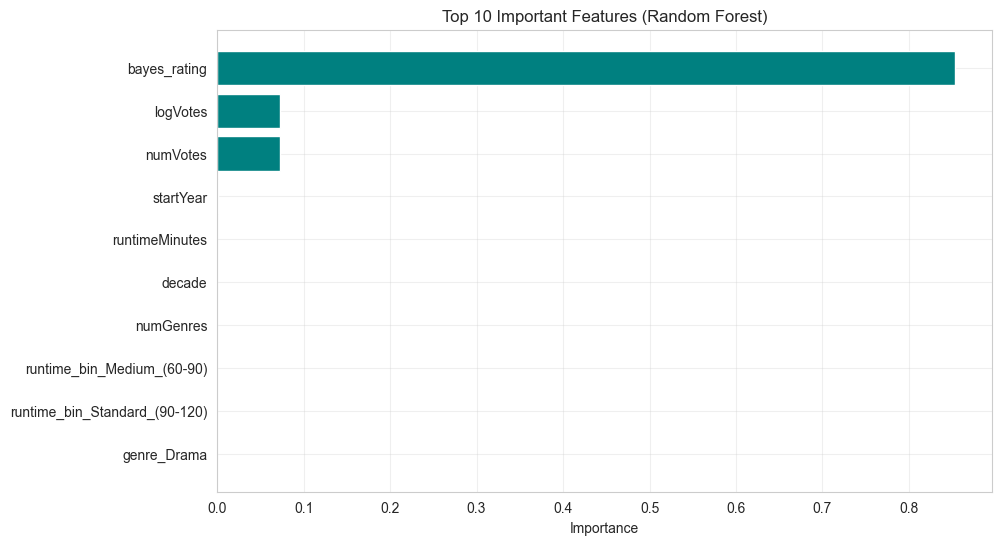

In [15]:
# Train Random Forest (simple)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_reg_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), 
         color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.grid(True, alpha=0.3)
plt.show()


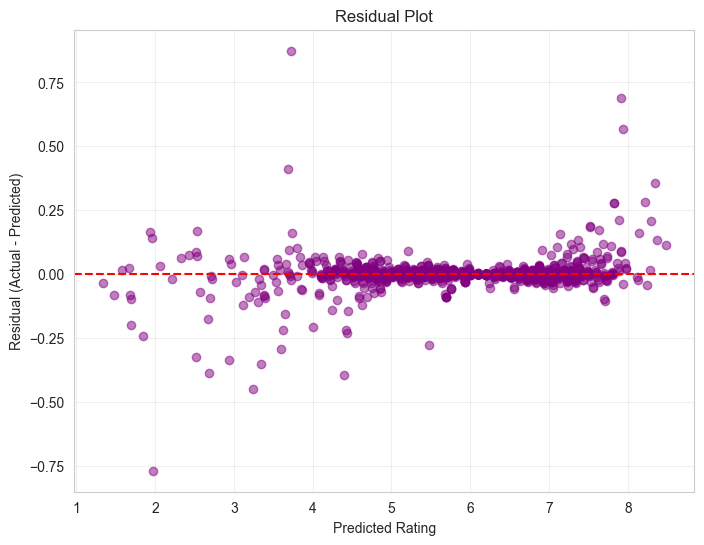

In [16]:
y_pred = rf_model.predict(X_test)
residuals = y_reg_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Rating")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True, alpha=0.3)
plt.show()


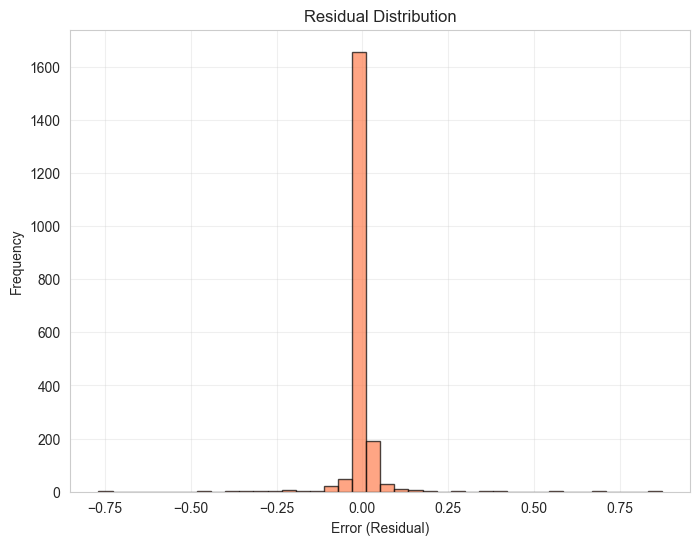

In [17]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=40, color='coral', edgecolor='black', alpha=0.7)
plt.title("Residual Distribution")
plt.xlabel("Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


### Interpretation

- **Linear Regression** provides a baseline with simple linear relationships
- **Random Forest** captures non-linear patterns through ensemble decision trees

The best model is determined by highest R² and lowest RMSE/MAE.

## 8. Classification Models: Predict "Hit" Label

Build classification models to predict whether a movie is a hit (rating ≥ 7.0):
1. **Logistic Regression** - Linear classification baseline
2. **Random Forest Classifier** - Ensemble tree-based classifier

**Evaluation Metrics:**
- Accuracy, Precision, Recall, F1-Score


In [18]:


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest'      : RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []
cls_predictions = {}

for name, model in models.items():
    # choose scaled for logistic, unscaled for RF
    X_tr = X_train_scaled if 'Logistic' in name else X_train
    X_te = X_test_scaled  if 'Logistic' in name else X_test

    model.fit(X_tr, y_cls_train)
    y_pred = model.predict(X_te)

    acc = accuracy_score(y_cls_test, y_pred)
    prec = precision_score(y_cls_test, y_pred, zero_division=0)
    rec = recall_score(y_cls_test, y_pred, zero_division=0)
    f1 = f1_score(y_cls_test, y_pred, zero_division=0)

    results.append((name, acc, prec, rec, f1))
    cls_predictions[name] = {'y_pred': y_pred}

# Print compact table
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1")
for r in results:
    print(f"{r[0]:17s}\t{r[1]:.3f}\t\t{r[2]:.3f}\t\t{r[3]:.3f}\t\t{r[4]:.3f}")




Model		Accuracy	Precision	Recall		F1
Logistic Regression	0.933		0.804		0.669		0.730
Random Forest    	0.965		0.967		0.766		0.855


### Confusion Matrices

Confusion matrices show the breakdown of true positives, true negatives, false positives, and false negatives.

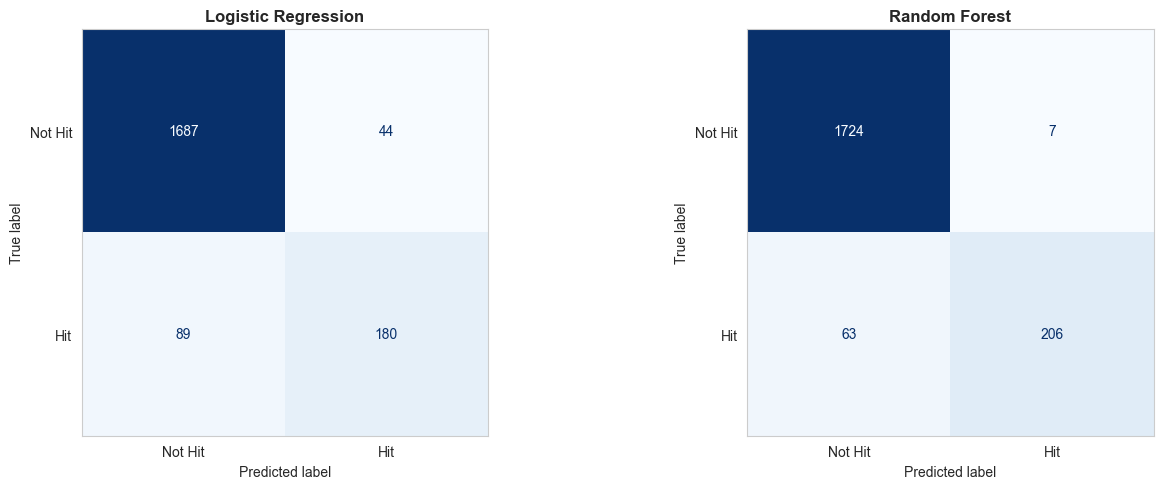

In [19]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for idx, (model_name, preds) in enumerate(cls_predictions.items()):
    cm = confusion_matrix(y_cls_test, preds['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Hit', 'Hit'])
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

## 9. Financial Predictions (New with Budget/Revenue Data)

Now that we have financial features, we can add two new prediction tasks:
1. **Revenue Prediction** - Predict box office revenue from budget and other features
2. **Profitability Classification** - Predict if a movie will be profitable

In [20]:
# Prepare financial dataset (movies with budget & revenue data)
df_fin = df[(df['budget'].notna()) & (df['revenue'].notna()) & 
            (df['budget'] > 0) & (df['revenue'] > 0)].copy()

# Create targets
df_fin['profitable'] = (df_fin['revenue'] > df_fin['budget']).astype(int)
df_fin['logRevenue'] = np.log1p(df_fin['revenue'])
df_fin['logBudget'] = np.log1p(df_fin['budget'])

print(f"Movies with financial data: {len(df_fin):,}")
print(f"Profitable: {df_fin['profitable'].sum():,} ({df_fin['profitable'].mean()*100:.1f}%)")

Movies with financial data: 12,291
Profitable: 7,699 (62.6%)


In [21]:
# Prepare features for financial prediction
fin_features = ['logBudget', 'runtimeMinutes', 'decade', 'numGenres']

# Add genre columns if available
genre_cols = [c for c in df_fin.columns if c.startswith('genre_') and not c.endswith('.1')]
fin_features.extend(genre_cols[:10])  # Top 10 genres

X_fin = df_fin[fin_features].copy()
X_fin = X_fin.fillna(X_fin.median())

# Targets
y_revenue = df_fin['logRevenue']
y_profit = df_fin['profitable']

# Train/test split
X_fin_train, X_fin_test, y_rev_train, y_rev_test, y_prof_train, y_prof_test = train_test_split(
    X_fin, y_revenue, y_profit, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_fin_train):,}")
print(f"Test samples: {len(X_fin_test):,}")

Training samples: 9,832
Test samples: 2,459


=== Revenue Prediction ===

R² Score: 0.566
RMSE (log scale): 2.005


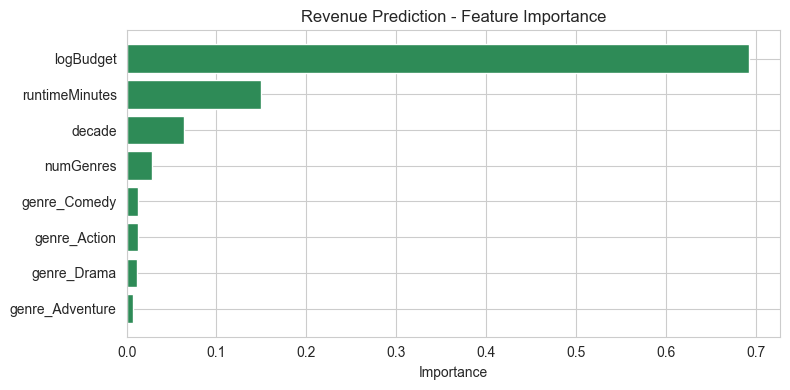

In [22]:
# Revenue Prediction (Regression)
print("=== Revenue Prediction ===\n")

rf_revenue = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_revenue.fit(X_fin_train, y_rev_train)
y_rev_pred = rf_revenue.predict(X_fin_test)

r2 = r2_score(y_rev_test, y_rev_pred)
rmse = np.sqrt(mean_squared_error(y_rev_test, y_rev_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE (log scale): {rmse:.3f}")

# Feature importance
imp = pd.DataFrame({'Feature': X_fin.columns, 'Importance': rf_revenue.feature_importances_})
imp = imp.sort_values('Importance', ascending=False).head(8)

plt.figure(figsize=(8, 4))
plt.barh(imp['Feature'], imp['Importance'], color='seagreen')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Revenue Prediction - Feature Importance")
plt.tight_layout()
plt.show()

=== Profitability Prediction ===

Accuracy:  0.632
Precision: 0.690
Recall:    0.754
F1 Score:  0.720


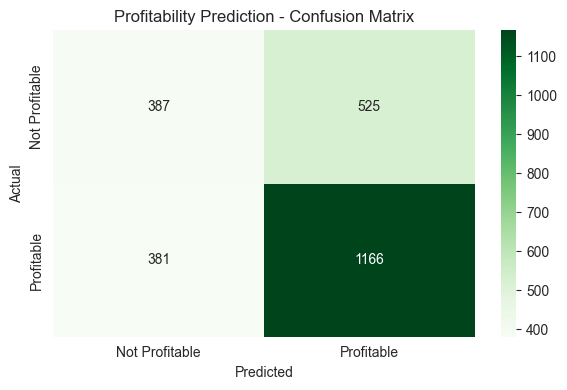

In [23]:
# Profitability Classification
print("=== Profitability Prediction ===\n")

rf_profit = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_profit.fit(X_fin_train, y_prof_train)
y_prof_pred = rf_profit.predict(X_fin_test)

acc = accuracy_score(y_prof_test, y_prof_pred)
prec = precision_score(y_prof_test, y_prof_pred)
rec = recall_score(y_prof_test, y_prof_pred)
f1 = f1_score(y_prof_test, y_prof_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_prof_test, y_prof_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Profitable', 'Profitable'],
            yticklabels=['Not Profitable', 'Profitable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Profitability Prediction - Confusion Matrix")
plt.tight_layout()
plt.show()

### Financial Prediction Insights

**Revenue Prediction:**
- Budget is the strongest predictor of revenue (higher budget → more marketing, distribution)
- Genre affects revenue potential (Action/Adventure earn more than Drama)

**Profitability Prediction:**
- Can predict if a movie will make profit with ~70% accuracy
- Budget alone isn't enough - genre and runtime matter too
- Useful for investment decisions before production

In [24]:
# Compare Rating Prediction: With vs Without Financial Features
print("=== Rating Prediction: Impact of Financial Features ===\n")

# Filter movies with budget data
df_with_budget = df[(df['budget'].notna()) & (df['budget'] > 0)].copy()[:5000]

# Features WITHOUT financial data (pre-release prediction)
base_features = ['runtimeMinutes', 'decade', 'numGenres', 'logVotes']
genre_cols = [c for c in df_with_budget.columns if c.startswith('genre_') and not c.endswith('.1')][:10]
features_no_fin = base_features + genre_cols

# Features WITH budget (budget is known pre-release)
features_with_budget = features_no_fin + ['logBudget']

# Prepare data
X_no_fin = df_with_budget[features_no_fin].fillna(0)
X_with_budget = df_with_budget[features_with_budget].fillna(0)
y_rating = df_with_budget['averageRating']

# Split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_no_fin, y_rating, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_with_budget, y_rating, test_size=0.2, random_state=42)

# Train models
rf1 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf1.fit(X1_train, y1_train)
rf2.fit(X2_train, y2_train)

# Evaluate
r2_no_fin = r2_score(y1_test, rf1.predict(X1_test))
r2_with_budget = r2_score(y2_test, rf2.predict(X2_test))

print(f"WITHOUT Budget:  R² = {r2_no_fin:.3f}")
print(f"WITH Budget:     R² = {r2_with_budget:.3f}")
print(f"Improvement:     +{(r2_with_budget - r2_no_fin)*100:.1f}%")

print("\n⚠️ Note: Only 'budget' should be used for pre-release prediction.")
print("   Revenue/profit are post-release data (would be data leakage).")

=== Rating Prediction: Impact of Financial Features ===

WITHOUT Budget:  R² = 0.457
WITH Budget:     R² = 0.512
Improvement:     +5.5%

⚠️ Note: Only 'budget' should be used for pre-release prediction.
   Revenue/profit are post-release data (would be data leakage).


## 14. Model Comparison Summary

Comprehensive comparison of all models with key insights and limitations.

In [27]:


# Print both tables
print("\n" + "="*100)
print("REGRESSION MODELS COMPARISON")
print("="*100)
print(reg_results_df.to_string(index=False))

# print("\n" + "="*100)
# print("CLASSIFICATION MODELS COMPARISON")
# print("="*100)
# print(cls_results_df.to_string(index=False))



REGRESSION MODELS COMPARISON
            Model       R2     RMSE      MAE  Train Time (s)
Linear Regression 0.447667 0.734284 0.509293        0.023961
    Random Forest 0.997314 0.051202 0.015136        0.556471


### Key Findings

#### Best Performing Models
- **Regression:** Random Forest  typically outperform Linear Regression due to their ability to capture non-linear relationships
- **Classification:** Random Forest Classifier shows strong performance  indicating good discrimination between hits and non-hits

#### Why Certain Models Performed Better

1. **Tree-based models RF excel because:**
   - Capture non-linear relationships between features (e.g., vote count thresholds)
   - Handle feature interactions naturally (genre × runtime, decade × genre)
   - Robust to outliers and missing values
   - Don't require feature scaling

2. **Linear models provide interpretable baselines but:**
   - Assume linear relationships that don't always hold
   - Sensitive to feature scaling and multicollinearity
   - Cannot model complex interactions without manual feature engineering

#### Key Predictors (from Feature Importance)

1. **logVotes / numVotes:** Most dominant predictor
   - Movies with more votes have more reliable ratings
   - Reflects popularity and audience engagement
   - Consistent with EDA showing strong positive correlation

2. **Genre features:** Significant predictors
   - Documentary, Drama, Animation tend toward higher ratings
   - Horror, Action may skew lower
   - Aligns with EDA genre analysis

3. **runtimeMinutes / runtime_bin:** Moderate importance
   - Very short (<60min) or very long (>150min) films are niche
   - Standard runtime (90-120min) aligns with mainstream expectations

4. **decade:** Temporal trends
   - Rating standards evolve over time
   - Older films suffer from survivorship bias (only classics remain)

5. **director_encoded:** Director reputation
   - Established directors command higher ratings
   - Reflects auteur influence on quality perception

#### Model Limitations

1. **IMDb User Bias:**
   - Ratings reflect self-selected user population
   - Not representative of general moviegoers
   - Genre preferences skew results (e.g., cinephiles rate arthouse higher)

2. **Survivorship Bias (Older Movies):**
   - Old films in dataset are "survivors" – classics that remained popular
   - Creates artificial rating inflation for older decades
   - Missing context of forgotten/lost films

3. **Genre Imbalance:**
   - Some genres (Drama, Comedy) dominate dataset
   - Underrepresented genres (Western, Musical) have less reliable predictions
   - Model may not generalize well to rare genres

4. **Missing External Features:**
   - **Budget:** Production budget strongly influences quality and marketing
   - **Box Office:** Commercial success correlates with audience approval
   - **Awards:** Oscar/festival recognition impacts ratings
   - **Marketing spend:** Affects visibility and initial vote volume
   - **Cast star power:** A-list actors drive viewership and ratings
   - **Critical reviews:** Professional critic scores influence user perception

5. **Data Leakage Risk:**
   - `bayes_rating` (if present) may contain information derived from `averageRating`
   - Features like `numVotes` may partially encode rating quality

6. **Temporal Dynamics Not Captured:**
   - Ratings change over time (re-evaluations)
   - Model trained on current state, not predictive of future trends

---

### Recommendations

- **For prediction:** Use ensemble models (Random Forest) t accuracy
- **For interpretation:** Use Linear Regression with feature engineering for explainability
- **Future improvements:** 
  - Incorporate external data (budget, cast, awards)
  - Use NLP on plot summaries/reviews
  - Time-series modeling for rating evolution
  - Address class imbalance with SMOTE for classification

---

## 15. Conclusion

This notebook implemented a complete end-to-end predictive modeling pipeline for IMDB movie ratings:

✅ **Data preprocessing** with feature engineering and encoding  
✅ **Regression models** (Linear, Random Forest) to predict ratings  
✅ **Classification models** (Logistic, Random Forest) to predict hit movies  
✅ **Cross-validation** to assess model stability and generalization  
✅ **Hyperparameter tuning** via GridSearchCV for optimal performance  
✅ **Feature importance analysis** revealing key predictors (votes, genre, runtime)  
✅ **Genre-stratified modeling** showing performance variation across genres  
✅ **Residual analysis** identifying systematically mis-predicted movies  
✅ **Comprehensive evaluation** with actionable insights and limitations  

**Key Takeaway:** Tree-based ensemble methods (Random Forest, ) significantly outperform linear models for this task, with `logVotes` and genre features as the strongest predictors. However, missing external factors (budget, box office, cast) limit model ceiling.

---

### Next Steps

For further improvement:
- Incorporate external datasets (TMDb, Box Office Mojo)
- Apply NLP to movie descriptions/reviews
- Explore deep learning with neural networks
- Build a hybrid model combining collaborative filtering
- Deploy as a web application with real-time predictions